# Tutorial 2
### Clustering `Epochs`

In [1]:
import epoch_tools as et
import mne
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the Epochs object from tutorial 1
epochs = et.Epochs.load_gz("test_data/tutorial1_Epochs.gz")

Reading C:\Users\basil\AppData\Local\Temp\tmp4bgboxdj-mne-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    4999.45 ms
        0 CTF compensation matrices available
Adding metadata with 257 columns
152 matching events found
No baseline correction applied
0 projection items activated


# Create feature set

In [8]:
# First you need to get the desired feature set
features = epochs.get_features(
    cols = [
        'OFC_R_delta',
        'OFC_R_theta_delta_ratio',
        'EMG_L_gamma'
    ],
    scaler = 'standard',
)
features

,OFC_R_delta,OFC_R_theta_delta_ratio,EMG_L_gamma
87,-1.291247,2.424429,0.832633
216,-0.493335,0.949638,0.770378
225,-0.193194,0.165476,0.565449
230,-0.265583,0.744371,0.173309
403,-0.309464,0.113845,1.842553
...,...,...,...
3768,-1.052478,1.641263,2.093631
3772,-0.420455,0.737173,2.413302
3773,-0.322748,0.696885,1.677949
3774,-0.390895,0.557592,1.830511


## Dimensionality reduction methods

In [9]:
epochs.feats

,OFC_R_delta,OFC_R_theta_delta_ratio,EMG_L_gamma
87,-1.291247,2.424429,0.832633
216,-0.493335,0.949638,0.770378
225,-0.193194,0.165476,0.565449
230,-0.265583,0.744371,0.173309
403,-0.309464,0.113845,1.842553
...,...,...,...
3768,-1.052478,1.641263,2.093631
3772,-0.420455,0.737173,2.413302
3773,-0.322748,0.696885,1.677949
3774,-0.390895,0.557592,1.830511


D:\RA\custom_libs\epoch_tools\epoch_tools\epochs.py:1833: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=plot_df, x='UMAP 1', y='UMAP 2', ax=ax, palette=palette, edgecolor=edgecolor, s=s, alpha=alpha, **kwargs)


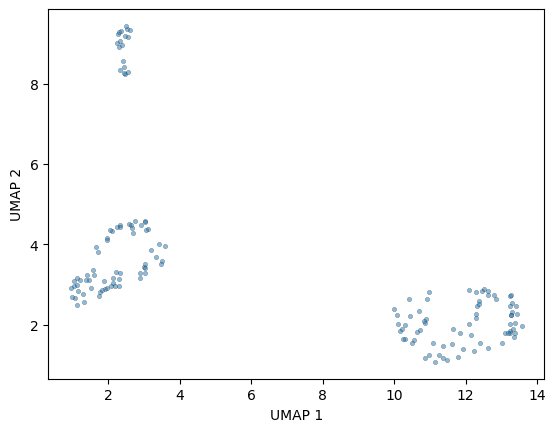

In [10]:
epochs.plot_umap(n_components=3)

D:\RA\custom_libs\epoch_tools\epoch_tools\epochs.py:1780: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=plot_df, x='t-SNE 1', y='t-SNE 2', ax=ax, palette=palette, edgecolor=edgecolor, s=s, alpha=alpha, **kwargs)


<Axes: xlabel='t-SNE 1', ylabel='t-SNE 2'>

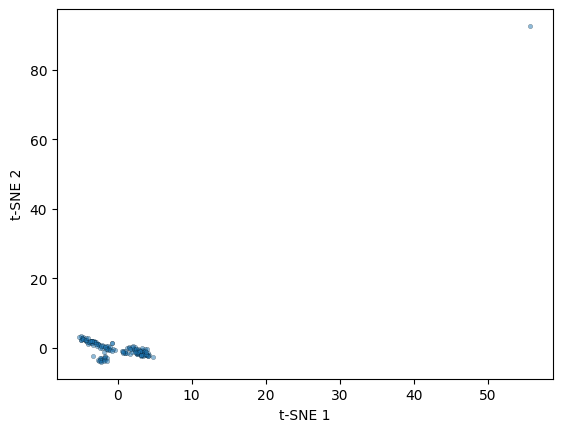

In [11]:
epochs.plot_tsne(n_components=3)

<Axes: title={'center': 'Feature Correlation Matrix'}>

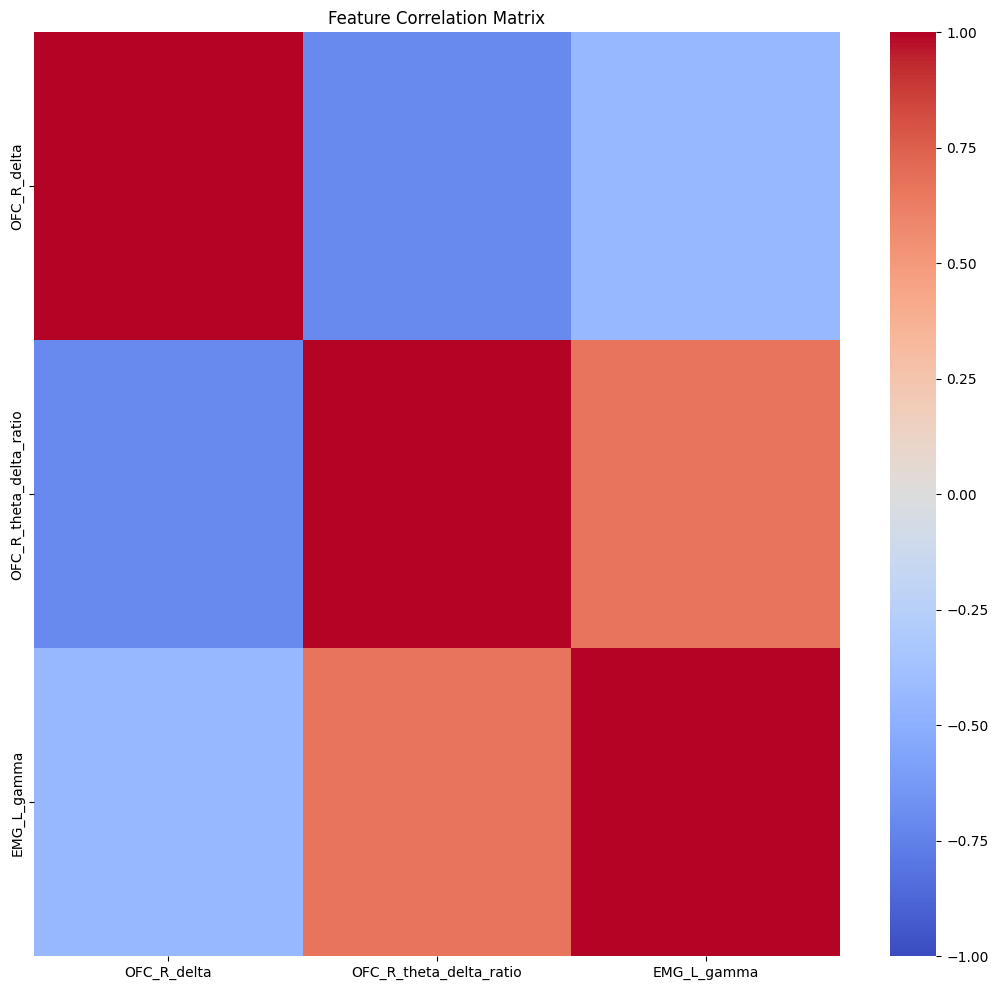

In [14]:
epochs.plot_feature_correlation()

## Clustering
Clustering is done by first applying dimensionality reduction (if desired), and then applying a clustering algorithm (kmeans or hdbscan). Each hyperparameter can be passed as a dictionary as shown below

In [15]:
reducer = "umap"
reducer_params = {"n_components": 3}

clusterer = "hdbscan"
clusterer_params = {"min_cluster_size": 10}

epochs.cluster_data(
    reducer = reducer,
    clusterer = clusterer,
    reducer_params = reducer_params,
    clusterer_params = clusterer_params
)

Number of clusters: 3
Percentage of clustered points: 100.0


We can visualize the result with a UMAP plot, now that the cluster labels have been assigned


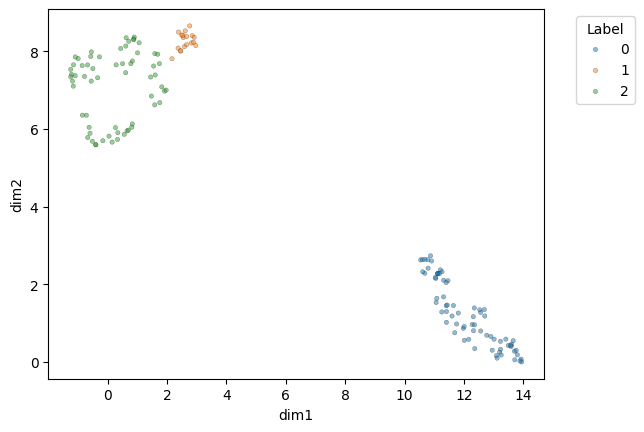

In [16]:
epochs.plot_dim_reduction()

Next step is interpreting the clusters, which is done on the next tutorial.

In [17]:
epochs.save_gz("test_data/tutorial2_Epochs.gz", overwrite=True)